# Twitter Sentiment140 Dataset

This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .

URL: https://www.kaggle.com/kazanova/sentiment140

It contains the following 6 fields:

**target**: the polarity of the tweet (0 = negative, 4 = positive)

**ids**: The id of the tweet ( 2087)

**date**: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

**flag**: The query (lyx). If there is no query, then this value is NO_QUERY.

**user**: the user that tweeted (robotickilldozr)

**text**: the text of the tweet (Lyx is cool)

Acknowledgements
The official link regarding the dataset with resources about how it was generated is here
The official paper detailing the approach is here

Citation: Go, A., Bhayani, R. and Huang, L., 2009. Twitter sentiment classification using distant supervision. CS224N Project Report, Stanford, 1(2009), p.12.

# Import Libraries

In [13]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB

import tensorflow.compat.v2 as tf

import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string

# Load Twitter Dataset

In [4]:
data = pd.read_csv("C:\\Users\\Mia\\Desktop\\twitter.csv", encoding='latin', names = ['polarity','id','date','query','user','text'])

In [5]:
#Use only 200,000 random rows of the original dataset for efficiency purposes
data = data.sample(frac=1)
data = data[:200000]

# Data Exploration

In [6]:
print("Dataset shape:", data.shape)

Dataset shape: (200000, 6)


In [7]:
#first 5 rows of the dataset
data.head()

,polarity,id,date,query,user,text
1283900,4,2001986068,Tue Jun 02 02:45:31 PDT 2009,NO_QUERY,savagestar,"@hrwildberlin Thanks, you too."
746427,0,2283001495,Mon Jun 22 12:04:43 PDT 2009,NO_QUERY,harryj1992,iPhone 3 is slow on the 3G what is apple doin...
301924,0,1998814814,Mon Jun 01 19:10:08 PDT 2009,NO_QUERY,robschafer,I'm bummed that I'll be missing the @Net2NO/@n...
1579032,4,2189888607,Tue Jun 16 01:10:36 PDT 2009,NO_QUERY,adrianrhen,is heading off to bed after a wonderful night....
467413,0,2175771591,Mon Jun 15 01:57:19 PDT 2009,NO_QUERY,nfornads,thinking whether to meet up with zal or not. s...


In [8]:
#last 5 rows of the dataset
data.tail()

,polarity,id,date,query,user,text
835915,4,1558317725,Sun Apr 19 08:00:03 PDT 2009,NO_QUERY,thatGarrettkid,10 second tidy!
953241,4,1824602872,Sun May 17 02:06:20 PDT 2009,NO_QUERY,Bruno108,@NiaBassett haha..im good just taking a break...
1475600,4,2065940210,Sun Jun 07 09:35:08 PDT 2009,NO_QUERY,daracallinan,@billyraycyrus I'm REALLY glad u like Ireland!...
290812,0,1995500136,Mon Jun 01 13:35:23 PDT 2009,NO_QUERY,granolajoe,Glad that many people used Target's Facebook a...
1319849,4,2014520626,Wed Jun 03 01:48:36 PDT 2009,NO_QUERY,seadawg10,im lovin life and lifes lovin me lol. only one...


In [19]:
#display technical information on columns
#no missing values(NaN)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 1283900 to 1319849
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   polarity    200000 non-null  int64 
 1   id          200000 non-null  int64 
 2   date        200000 non-null  object
 3   query       200000 non-null  object
 4   user        200000 non-null  object
 5   text        200000 non-null  object
 6   word count  200000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 12.2+ MB


In [11]:
# Replacing the polarity value of 4 with 1(0 = negative, 1 = positive sentiment)
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
1283900,1,2001986068,Tue Jun 02 02:45:31 PDT 2009,NO_QUERY,savagestar,"@hrwildberlin Thanks, you too."
746427,0,2283001495,Mon Jun 22 12:04:43 PDT 2009,NO_QUERY,harryj1992,iPhone 3 is slow on the 3G what is apple doin...
301924,0,1998814814,Mon Jun 01 19:10:08 PDT 2009,NO_QUERY,robschafer,I'm bummed that I'll be missing the @Net2NO/@n...
1579032,1,2189888607,Tue Jun 16 01:10:36 PDT 2009,NO_QUERY,adrianrhen,is heading off to bed after a wonderful night....
467413,0,2175771591,Mon Jun 15 01:57:19 PDT 2009,NO_QUERY,nfornads,thinking whether to meet up with zal or not. s...


In [12]:
#descriptive statistics on the polarity column
data['polarity'].describe()

count    200000.000000
mean          0.501950
std           0.499997
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: polarity, dtype: float64

Text(0.5, 1.0, 'Sentiment Data Distribution')

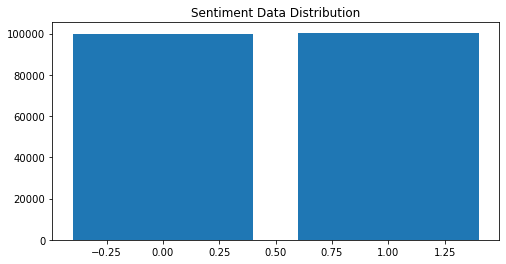

In [14]:
#Sentiment Data Distribution
val_count = data.polarity.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [15]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         200000
No. of positve tagged sentences is:  100390
No. of negative tagged sentences is: 99610


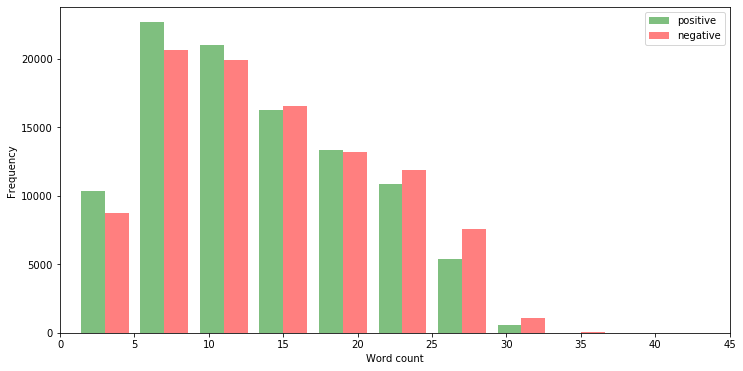

In [16]:
# get a word count per of text
def word_count(words):
    return len(words.split())

# plot word count distribution for both positive and negative 

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [18]:
#top 10 most frequent words in dataset
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(10)

[('the', 65228),
 ('and', 36877),
 ('you', 29600),
 ('for', 27079),
 ('have', 17894),
 ('that', 16070),
 ("i'm", 15930),
 ('but', 15546),
 ('just', 15514),
 ('with', 14245)]

In [20]:
# Removing the unnecessary columns.
data.drop(['id', 'date','query','user','word count'], axis=1, inplace=True)

In [21]:
data.head()

,polarity,text
1283900,1,"@hrwildberlin Thanks, you too."
746427,0,iPhone 3 is slow on the 3G what is apple doin...
301924,0,I'm bummed that I'll be missing the @Net2NO/@n...
1579032,1,is heading off to bed after a wonderful night....
467413,0,thinking whether to meet up with zal or not. s...


In [22]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [23]:
#importing stopword from nltk
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mia\AppData\Roaming\nltk_data...


{'won', 'them', 'here', 're', 'm', 'while', 'weren', "hadn't", 'it', 've', "didn't", "haven't", 'does', 'my', 'the', 'off', 'his', 'will', 'herself', "you're", 'under', 'each', 'once', 'how', 'myself', 'for', 'below', 'what', 'whom', "don't", "won't", 'both', 'more', 'very', 'o', 'we', 'shouldn', 'our', 'at', 'over', 'did', 'll', 'being', 'further', 'been', 'few', 'don', "isn't", 'were', 'have', "that'll", 'before', 'didn', 'doesn', 'that', 'i', 'they', 'again', 'can', 'are', 'is', 'about', 'same', 'then', 'was', 'hers', 'themselves', 'against', 'own', "it's", 'down', 'mightn', 'he', "wouldn't", 'ma', 'be', 'or', 'itself', 'during', 'y', 'their', "doesn't", 'where', 'mustn', 'ours', 'just', 'shan', "should've", 'her', "needn't", 'am', 'when', 'hasn', 'which', 'other', 'from', 'needn', 'yourself', 'there', 'not', 'some', 'couldn', 'until', 'because', 'in', 'any', 'through', "wasn't", 'having', 'doing', 'only', 'him', 'to', 'all', "shouldn't", "weren't", 't', 'these', "you've", 'has', 'b

[nltk_data]   Unzipping corpora\stopwords.zip.


In [28]:
'''
Punkt Sentence Tokenizer

This tokenizer divides a text into a list of sentences
by using an unsupervised algorithm to build a model for abbreviation
words, collocations, and words that start sentences.  It must be
trained on a large collection of plaintext in the target language
before it can be used.

WordNet is used for lemmatizing 
'''

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Mia\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

# Preprocessing Tweets

The Preprocessing steps taken are:

**Lower Casing:** Each text is converted to lowercase.

**Removing URLs:** Links starting with "http" or "https" or "www" are replaced by "".

**Removing Usernames:** Replace @Usernames with word "". (eg: "@XYZ" to "")

**Removing Short Words:** Words with length less than 2 are removed.

**Removing Stopwords:** Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")

**Lemmatizing:** Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [25]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'

def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [29]:
#apply process_tweets function to each entry in the text feature
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))

In [30]:
#display first 5 processed tweets
data.head()

,polarity,text,processed_tweets
1283900,1,"@hrwildberlin Thanks, you too.",hrwildberlin thanks
746427,0,iPhone 3 is slow on the 3G what is apple doin...,phone slow 3g apple u
301924,0,I'm bummed that I'll be missing the @Net2NO/@n...,bummed ill missing mashup tomorrow night
1579032,1,is heading off to bed after a wonderful night....,heading bed wonderful night sleep tight everyone
467413,0,thinking whether to meet up with zal or not. s...,hinking whether meet zal tired


# Analyzing the Data

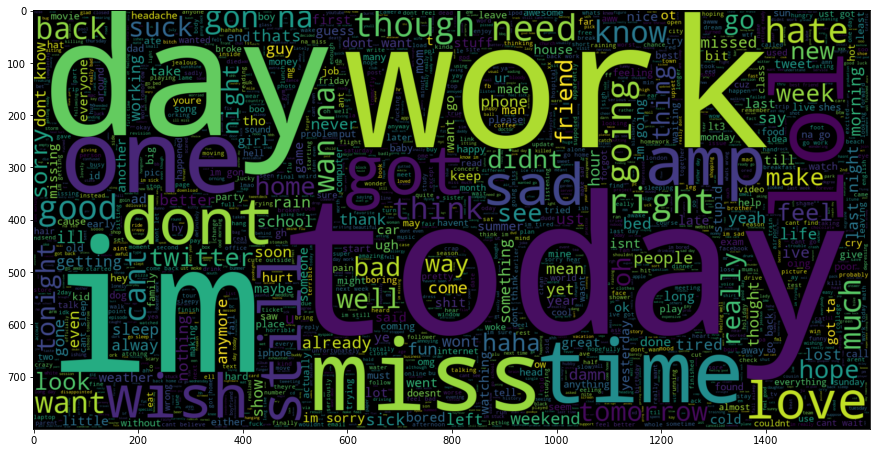

In [31]:
#Word-Cloud for Negative Tweets

plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

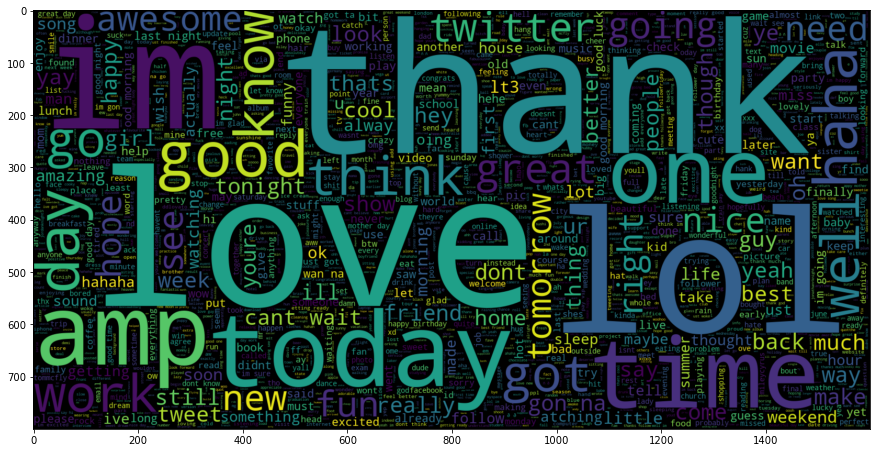

In [32]:
#Word-Cloud for positive tweets

plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

# Vectorization and splitting dataset

In [33]:
X = data['processed_tweets'].values
y = data['polarity'].values

In [34]:
print(X.shape)
print(y.shape)

(200000,)
(200000,)


In [35]:
#Convert text to word frequency vectors using TF-IDF(Term Frequency - Inverse Document Frequency)

'''
Term Frequency: This summarizes how often a given word appears within a document.
Inverse Document Frequency: This downscales words that appear a lot across documents.
'''

#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print('No. of feature_words: ', len(vector.get_feature_names()))

No. of feature_words:  170449


In [36]:
print(X.shape)
print(y.shape)

(200000, 170449)
(200000,)


In [37]:
#Split dataset of 200,000 processed tweets into 80% for training data
#and remaining 20% on testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

In [38]:
#display shapes of training and testing 
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (160000, 170449)
y_train (160000,)

X_test (40000, 170449)
y_test (40000,)


# Machine Learning Models

In [39]:
'''
define a function that can be used for any machine learning algorithm
outputs
accuracy score on training and testing data
evaluation metrics
confusion matrix
'''

def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# Logistic Regression

Accuracy of model on training data : 83.643125
Accuracy of model on testing data : 77.1575 

              precision    recall  f1-score   support

           0       0.79      0.74      0.76     19925
           1       0.76      0.80      0.78     20075

    accuracy                           0.77     40000
   macro avg       0.77      0.77      0.77     40000
weighted avg       0.77      0.77      0.77     40000



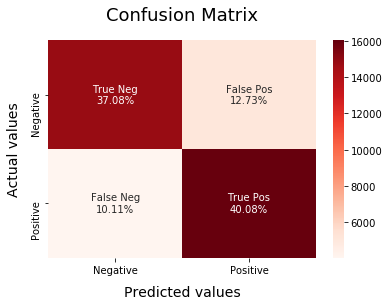

In [40]:
#Logistic Regression model
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

# Random Forest Classifier

Accuracy of model on training data : 74.7375
Accuracy of model on testing data : 69.77499999999999 

              precision    recall  f1-score   support

           0       0.74      0.60      0.66     19925
           1       0.67      0.79      0.72     20075

    accuracy                           0.70     40000
   macro avg       0.71      0.70      0.69     40000
weighted avg       0.70      0.70      0.69     40000



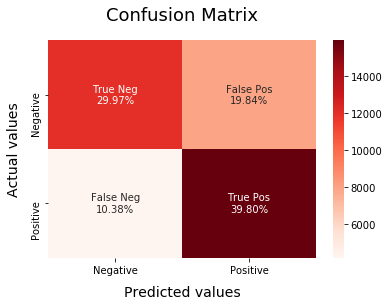

In [41]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

# Naive Bayes

Accuracy of model on training data : 86.85312499999999
Accuracy of model on testing data : 75.925 

              precision    recall  f1-score   support

           0       0.75      0.78      0.76     19925
           1       0.77      0.74      0.76     20075

    accuracy                           0.76     40000
   macro avg       0.76      0.76      0.76     40000
weighted avg       0.76      0.76      0.76     40000



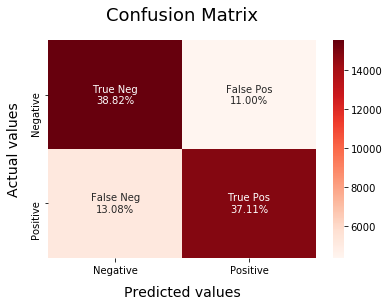

In [42]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

# Linear SVM

Accuracy of model on training data : 93.12
Accuracy of model on testing data : 75.99000000000001 

              precision    recall  f1-score   support

           0       0.77      0.74      0.75     19925
           1       0.75      0.78      0.76     20075

    accuracy                           0.76     40000
   macro avg       0.76      0.76      0.76     40000
weighted avg       0.76      0.76      0.76     40000



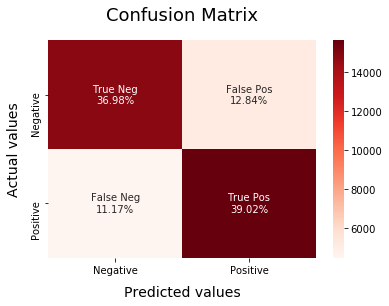

In [43]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

# Deep Learning Models

LSTM - Long Short Term Memory: widely used for language modeling, sentiment analysis, and text prediction

RNN - Recurrent Neural Networks: suited for machine learning problems that involve sequential data

In [44]:
#imports

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import re

Using TensorFlow backend.


In [45]:
'''
KERAS Tokenizer

This class allows to vectorize a text corpus, by turning each text into either
a sequence of integers (each integer being the index of a token in a dictionary)
or into a vector where the coefficient for each token could be binary, 
based on word count, based on tf-idf...

This function transforms a list (of length num_samples) of sequences 
(lists of integers) into a 2D Numpy array of shape (num_samples, num_timesteps)
. num_timesteps is either the maxlen argument if provided, or the length of the
longest sequence in the list.
'''

import keras
keras.__version__
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data.processed_tweets)
sequences = tokenizer.texts_to_sequences(data.processed_tweets)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...    0    0   28]
 [   0    0    0 ... 1726  733  111]
 [   0    0    0 ...  297   38   22]
 ...
 [   0    0    0 ...  688 1893 1031]
 [   0    0    0 ...  643  253  544]
 [   0    0    0 ...   29 2501   16]]


In [46]:
#Split processed dataset into 80% training, and 20% for testing purposes
X_train, X_test, y_train, y_test = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=101)

In [53]:
#Neural Network architecture
#total of 5 layers
#last layer consists of a single neuron using the sigmoid activation function
#hidden layers use the rectified linear unit
#adam gradient decent optimizer is used, with a loss function of
#binary_crossentropy(positive/negative)

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
model2 = Sequential()
model2.add(layers.Embedding(max_words, 128))
model2.add(layers.LSTM(64,dropout=0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
checkpoint2 = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/10
5000/5000 [==============================] - ETA: 0s - loss: 0.5061 - accuracy: 0.7498
Epoch 00001: val_accuracy improved from -inf to 0.76673, saving model to rnn_model.hdf5
5000/5000 [==============================] - 881s 176ms/step - loss: 0.5061 - accuracy: 0.7498 - val_loss: 0.4839 - val_accuracy: 0.7667
Epoch 2/10
5000/5000 [==============================] - ETA: 0s - loss: 0.4663 - accuracy: 0.7768
Epoch 00002: val_accuracy improved from 0.76673 to 0.77085, saving model to rnn_model.hdf5
5000/5000 [==============================] - 870s 174ms/step - loss: 0.4663 - accuracy: 0.7768 - val_loss: 0.4792 - val_accuracy: 0.7709
Epoch 3/10
5000/5000 [==============================] - ETA: 0s - loss: 0.4500 - accuracy: 0.7853
Epoch 00003: val_accuracy did not improve from 0.77085
5000/5000 [==============================] - 868s 174ms/step - loss: 0.4500 - accuracy: 0.7853 - val_loss: 0.4810 - val_accuracy: 0.7693
Epoch 4/10
5000/5000 [==============================] - ETA: 

In [54]:
#example run on neural network (negative statement)

sequence = tokenizer.texts_to_sequences(['this data science article is the worst ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

Negative


In [55]:
#sentiment analysis score(negative):

sequence = tokenizer.texts_to_sequences(['this data science article is the worst ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)

print(pred)

[[0.03374404]]


In [56]:
#sentiment analysis score(positive):

sequence = tokenizer.texts_to_sequences(['this data science article is the best ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)

print(pred)

[[0.919686]]


# MODEL EVALUATION

In [61]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

test_loss, test_acc = model2.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1250/1250 [==============================] - 56s 45ms/step - loss: 0.5328 - accuracy: 0.7635
Test accuracy: 0.7634750008583069


# VADER Vs. RNN Model 

In [68]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
statement = "This was a great movie"


sequence = tokenizer.texts_to_sequences(['This was a great movie'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)

print("VADER: ", sid.polarity_scores(statement))
print("RNN: ", pred)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


VADER:  {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}
RNN:  [[0.9879675]]


# Integrating Various Models(testing)

In [67]:
#average the sentiment score of RNN, VADER, and TextBlob 


'''
TEST ACCURACY %
RNN: 76.34750008583069 (2)
Linear SVM: 75.99000000000001 (3)
Random Forest Classifier: 69.77499999999999 
Bernoulli Naive Bayes: 75.925
Logistic Regression: 77.1575 (1)
'''

'''
VADER COMPOUND SCORE: [-1, +1]
RNN Score: [0, 1]
TextBlob: [-1, +1]
'''


def sentiment_score(text):
    vader_compound = sid.polarity_scores(statement)['compound']
    
    sequence = tokenizer.texts_to_sequences([statement])
    test = pad_sequences(sequence, maxlen=max_len)
    rnn_score = model2.predict(test)
    
    textblob_polarity_score = TextBlob(text).sentiment.polarity
    
    avg = (vader_compound + rnn_score + textblob_polarity_score)/3
    
    text_classification = ""
    
    if avg > 0.5:
        text_classification = "Positive"
    else avg < 0.5
    
    return avg, classification
    
    
#sample run

print(sentiment_score("This was a good movie"))

[[0.7709558]]


In [ ]:
#VADER OUTPERFORMS ALL MODELS IN DOMAIN OF SOCIAL MEDIA(TWEETS)
#POOR PERFORMANCE ON MOVIE REVIEWS, PRODUCT REVIEWS, AND OPINION BASED TEXT
#SUCH AS NEW YORK TIMES